## Loading data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

boston = pd.read_csv('boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Plotting

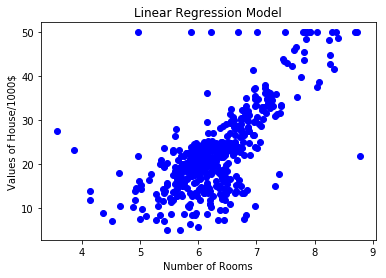

In [3]:
X = boston.drop('MEDV',axis=1)
y = boston['MEDV'].values

plt.scatter(X['RM'], y, color = 'blue')
plt.title('Linear Regression Model')
plt.xlabel('Number of Rooms')
plt.ylabel('Values of House/1000$')
plt.show()

## Linear Regression, Ridge, Lasso, ElasticNet

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) 

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

reg = LinearRegression()
reg.fit(X_train,y_train)
print("Linear Regression R^2 score:", reg.score(X_test,y_test))

ridge = Ridge(alpha=0.1) 
ridge.fit(X_train, y_train) 
print("Ridge R^2 score:",ridge.score(X_test, y_test))

lasso = Lasso(alpha=0.1) 
lasso.fit(X_train, y_train) 
print("Lasso R^2 score:",lasso.score(X_test, y_test))

elasticnet=ElasticNet(alpha=0.1,l1_ratio=0.5)
elasticnet.fit(X_train, y_train) 
print("ElasticNet R^2 score:",elasticnet.score(X_test, y_test))

Linear Regression R^2 score: 0.7112260057484887
Ridge R^2 score: 0.7103178206391325
Lasso R^2 score: 0.6918147952283056
ElasticNet R^2 score: 0.6923143155381943


In [5]:
from sklearn.metrics import r2_score
y_pred=reg.predict(X_test)
# Calculate the performance of model
score = r2_score(y_test,y_pred)
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.711.


## Lasso regression for feature selection

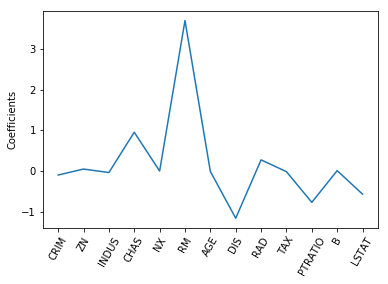

In [6]:
names=boston.drop('MEDV',axis=1).columns

lasso_coef = lasso.fit(X,y).coef_

plt.plot(range(len(names)),lasso_coef)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')
plt.show()

# PCA
## Intrinsic dimension

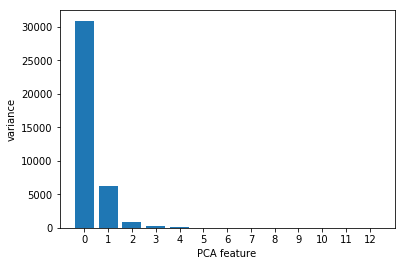

In [7]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X)

features=range(pca.n_components_)

plt.bar(features,pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

## Dimension reduction

(506, 2)


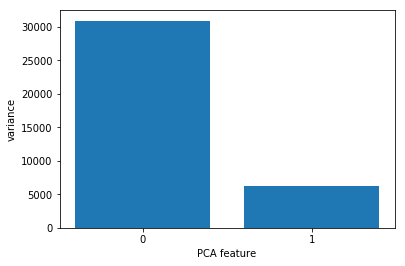

In [8]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_transformed = pca.transform(X)
print(X_transformed.shape)


features=range(pca.n_components_)
plt.bar(features,pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.3, random_state=42) 

reg = LinearRegression()
reg.fit(X_train,y_train)
print("Linear Regression R^2 score:", reg.score(X_test,y_test))

Linear Regression R^2 score: 0.2463985100861473
